##Project goal -
Like any other business Telco business loses money as customers leave.
In this telco dataset, we will ***predict*** which customers will leave the opted service (churn) before they do so with the help of ML.

We will give a good understanding of reasons for which the company experienced customer churn and a model that will predict such phenomenon for the future helping in reduced revenue loss and increasing customer retention and lifetime value.






In [ ]:
import pandas as pd, numpy as np

df = pd.read_csv('/content/Telco-Customer-Churn.csv')

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#Telco Customer Dataset EDA -
With roughly 7000 customers in the dataset, we get a mix of features (columns that define either a characterstic of the customer or process they opt for) that are both numerical (charges, tenure) or categorical (contract type, payment methods).

Our target variable will be churn (yes/no).

It is a slightly imbalanced dataste with 27% churners.

In [ ]:
display(df.isna().sum(), df.duplicated())
df.info()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#checking all the unique values
skip_cols = ["columns name"]
for col in df.columns:
  if col in skip_cols:
    continue

    print(f"{col}:", df[col].unique(), "\n")

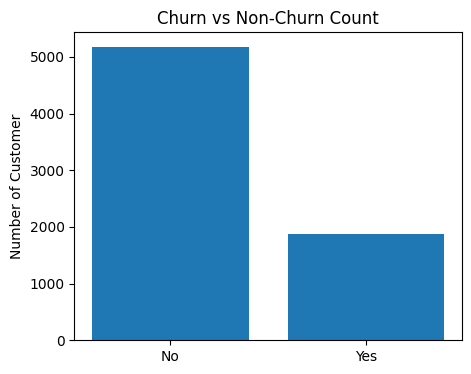

<Figure size 800x500 with 0 Axes>

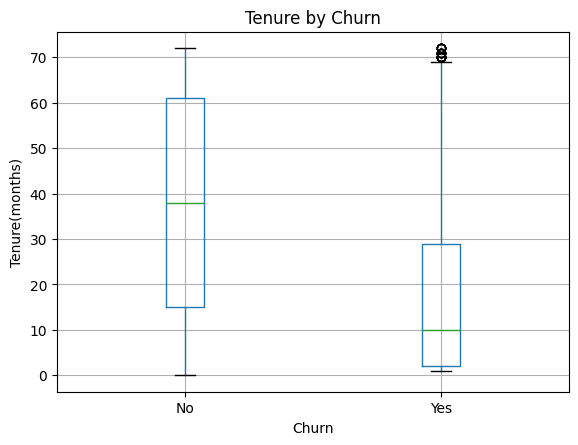

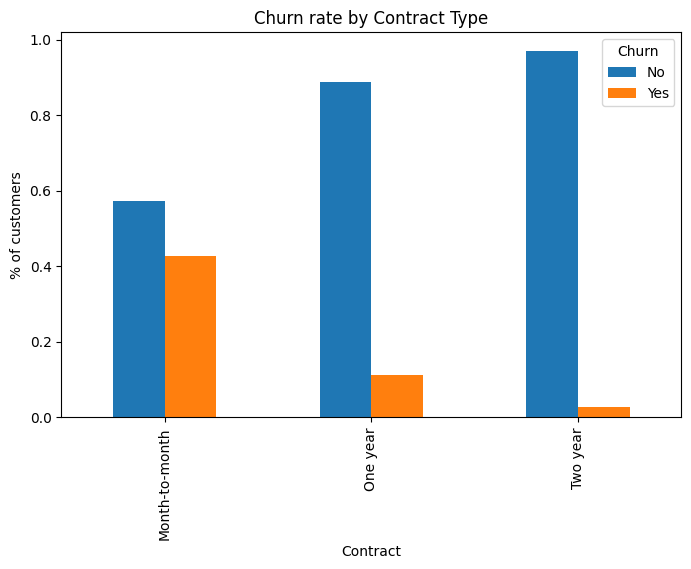

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# bar plot to understand churn rate
churn_count = df['Churn'].value_counts().sort_index()
plt.figure(figsize=(5,4))
plt.bar(['No', 'Yes'], churn_count)
plt.title('Churn vs Non-Churn Count')
plt.ylabel('Number of Customer')
plt.show()


# Getting tenure distribution by churn

plt.figure(figsize=(8,5))
df.boxplot(column='tenure', by='Churn')
plt.title('Tenure by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Tenure(months)')
plt.show()


#getting churn by contract type

cross = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
cross[['No', 'Yes']].plot(kind='bar', figsize=(8,5))
plt.ylabel('% of customers')
plt.title('Churn rate by Contract Type')
plt.show()

We'll drop the customer ID columns, no need for that in our model for now.

We will convert a few columns -
- yes/no columns to 1/0(easier and faster for machine to read)
- As we checked above in unique values for customers some columns have yes/no and a 3rd option, we've put those columns in col3 (below) and replaced the 3rd option with no because it bascially meant the same thing (no internet service and no phone service)
- We've made sure to convert Totalcharges columns to float as it was showing as object in our eda process and dropped the few NaN columns that it had.

In [ ]:
df = df.drop('customerID', axis = 1)

col3=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']
for c in col3:
  df[c] = df[c].replace({'No internet service': 'No'})


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service' : 'No'})


df.head(20)

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in binary_cols:
  df[col] = df[col].map({'Yes': 1, 'No': 0})

df.head(10)
df = df.dropna(subset=["TotalCharges"])
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Below is the 2nd part of ***data preprocessing*** where we did the major stuff.

 - we made seperate variables for categorical, numerical and binary columns(reused from before)
 - we made a pipeline to scale and encode it in one go so there's no chance of data leaks.
 - Using columns transformer and pipeline we achieved leakproof preprocessing that can be reused without any issue.


##Baseline models-
We made 2 models to get a baseline of how the learning might happen on each one and how much we need to tune OR IF we need to change the model.

We used Logistic Regression and Random Forest and got baseline scores of
- Logistic Regression-
  - F1 score - 0.60
  - Recall - 0.56
- Random Forest -
  - F1 score - 0.54
  - Recall - 0.48

Logistic Regression was surprisingly strong on this one so we moved forwared with its tuning.





In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split


catcol = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

numcol = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_t = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_t = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_t, numcol),
        ('cat', cat_t, catcol)
    ],
    remainder='passthrough'
)


xx = df.drop('Churn', axis = 1)
y = df['Churn']

xtr, xte, ytr, yte = train_test_split(xx, y,
                                      test_size=0.2, random_state=51)


log_pipe = Pipeline([
    ('prep', preprocessor),
    ('logreg', LogisticRegression(max_iter=5000))
])

log_pipe.fit(xtr, ytr)
ypredlog = log_pipe.predict(xte)

print('LR F1:', f1_score(yte, ypredlog))
print('LR Confusion Matrix:', confusion_matrix(yte, ypredlog))
print("LR Classification Report:", classification_report(yte, ypredlog))


rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=900,
                                      random_state =51))
])

rf_pipe.fit(xtr, ytr)
ypredrf = rf_pipe.predict(xte)

print('RF F1:', f1_score(yte, ypredrf))
print('RF Confusion Matrix:', confusion_matrix(yte, ypredrf))
print("RF Classification Report:", classification_report(yte, ypredrf))

LR F1: 0.6031746031746031
LR Confusion Matrix: [[923 114]
 [161 209]]
LR Classification Report:               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1037
           1       0.65      0.56      0.60       370

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

RF F1: 0.5468509984639017
RF Confusion Matrix: [[934 103]
 [192 178]]
RF Classification Report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1037
           1       0.63      0.48      0.55       370

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



We mainly used gridsearchCV and stratified k fold on logistic regression

We set a list of parameters that we can plug into grisdsearch and used stratified k fold inside it for more through train test split rotation.

After this we got -
- F1 - 0.65 (increased f1 score)
- Recall - 0.84 (really decent)

Before further tuning, we again explored a widely used model in the industry which usually gives better results i.e. XGBoost.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=51 )

log_param_grid = {
    'logreg__C':[0.1, 1, 10, 50],
    'logreg__class_weight': [None, 'balanced']
}

gsearch = GridSearchCV(
    estimator = log_pipe,
    param_grid= log_param_grid,
    scoring='f1',
    cv = skf,
    n_jobs = -1,
    verbose = 2,
)

gsearch.fit(xtr, ytr)
print('Best params:', gsearch.best_params_)

gpred_log = gsearch.predict(xte)

print('Gridsearch F1:', f1_score(yte, gpred_log))
print('Gridsearch Confusion Matrix:', confusion_matrix(yte, gpred_log))
print("Gridsearch CL Report:", classification_report(yte, gpred_log))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'logreg__C': 0.1, 'logreg__class_weight': 'balanced'}
Gridsearch F1: 0.6533192834562698
Gridsearch Confusion Matrix: [[768 269]
 [ 60 310]]
Gridsearch CL Report:               precision    recall  f1-score   support

           0       0.93      0.74      0.82      1037
           1       0.54      0.84      0.65       370

    accuracy                           0.77      1407
   macro avg       0.73      0.79      0.74      1407
weighted avg       0.82      0.77      0.78      1407



In [ ]:
from xgboost import XGBClassifier

'''
first half tuned xgb model preds just upset me so i searched for
better tunes for such dataset and made a newer one


xg_pipe = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBClassifier(
        eval_metric='logloss',
        tree_method='hist',
        random_state=51,
        n_jobs=-1
    ))
])

pos = np.sum(ytr==1)
neg = np.sum(ytr==0)
scale_pos_weight = neg/pos


xgb_param_grid = {
    'xgb__n_estimators': [500,800,1000],
    'xgb__max_depth': [3,4,6],
    'xgb__learning_rate': [0.01, 0.03, 0.05],
    'xgb__subsample': [0.8],
    'xgb__colsample_bytree': [0.8],
    'xgb__scale_pos_weight': [scale_pos_weight]
}

xgb_search = GridSearchCV(
    estimator= xg_pipe,
    param_grid = xgb_param_grid,
    scoring='f1',
    cv = skf,
    n_jobs =-1,
    verbose=2,
)

xgb_search.fit(xtr, ytr)
xgpred = xgb_search.predict(xte)


print('Best params:', xgb_search.best_params_)


print('Gridsearch F1:', f1_score(yte, xgpred))
print('Gridsearch Confusion Matrix:', confusion_matrix(yte, xgpred))
print("Gridsearch CL Report:", classification_report(yte, xgpred))
'''

In [ ]:
from xgboost import XGBClassifier

xg_pipe = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBClassifier(
        eval_metric='aucpr',
        tree_method='hist',
        random_state=51,
        n_jobs=-1
    ))
])

pos = np.sum(ytr == 1)
neg = np.sum(ytr == 0)
scale_pos_weight = neg / pos

xgb_param_grid = {
    'xgb__n_estimators': [800, 1000, 1200],
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.01, 0.03],
    'xgb__subsample': [0.8],
    'xgb__colsample_bytree': [0.8],
    'xgb__scale_pos_weight': [scale_pos_weight],
    'xgb__min_child_weight': [1, 3],
    'xgb__gamma': [0.1],
}

xgb_search = GridSearchCV(
    estimator=xg_pipe,
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=skf,
    n_jobs=-1,
    verbose=2,
)

xgb_search.fit(xtr, ytr)

print('Best params:', xgb_search.best_params_)

# Default 0.5 threshold
xgpred = xgb_search.predict(xte)
print('Gridsearch F1 (t=0.5):', f1_score(yte, xgpred))
print('Confusion Matrix (t=0.5):\n', confusion_matrix(yte, xgpred))
print("CL Report (t=0.5):\n", classification_report(yte, xgpred))

# --- Threshold tuning ---
proba = xgb_search.predict_proba(xte)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(yte, (proba >= t).astype(int)) for t in thresholds]

best_idx = np.argmax(f1_scores)
best_t = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print("\nBest threshold:", best_t)
print("Best F1 with tuned threshold:", best_f1)

y_pred_best = (proba >= best_t).astype(int)
print("Confusion Matrix (best t):\n", confusion_matrix(yte, y_pred_best))
print("CL Report (best t):\n", classification_report(yte, y_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 4, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 1000, 'xgb__scale_pos_weight': np.float64(2.7525016677785192), 'xgb__subsample': 0.8}
Gridsearch F1 (t=0.5): 0.6274089935760171
Confusion Matrix (t=0.5):
 [[766 271]
 [ 77 293]]
CL Report (t=0.5):
               precision    recall  f1-score   support

           0       0.91      0.74      0.81      1037
           1       0.52      0.79      0.63       370

    accuracy                           0.75      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.75      0.77      1407


Best threshold: 0.6199999999999998
Best F1 with tuned threshold: 0.6411837237977805
Confusion Matrix (best t):
 [[856 181]
 [110 260]]
CL Report (best t):
               precision    recall  f1-score   support

           0       0.89      0.83      0

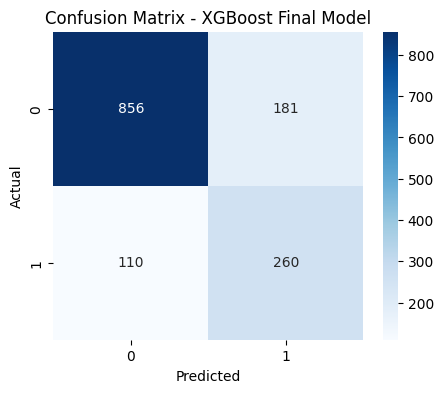

In [ ]:
cm = confusion_matrix(yte, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Final Model')
plt.show()

After a decent tune of XGB model, we still got a lesser performing model than the Lin Reg we did before. But its stil good so we continued forward with it.

We passed it through a global SHAP explainer to see which feature was most important and decisive in the predictions, a summary/beeswarm plot of the same and a force plot.

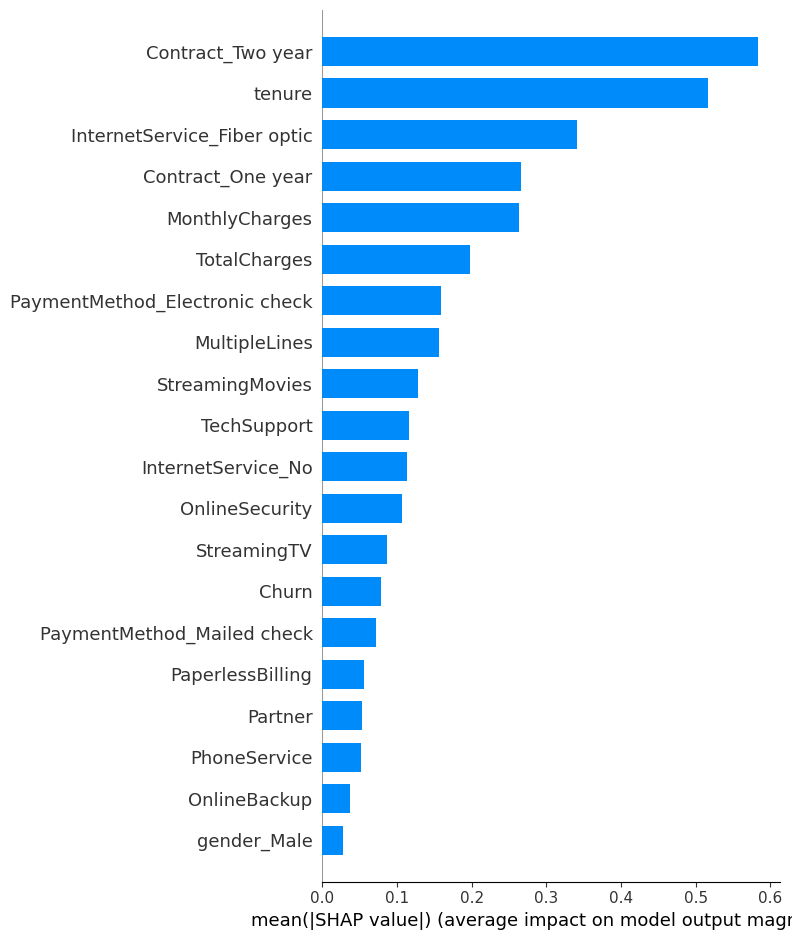

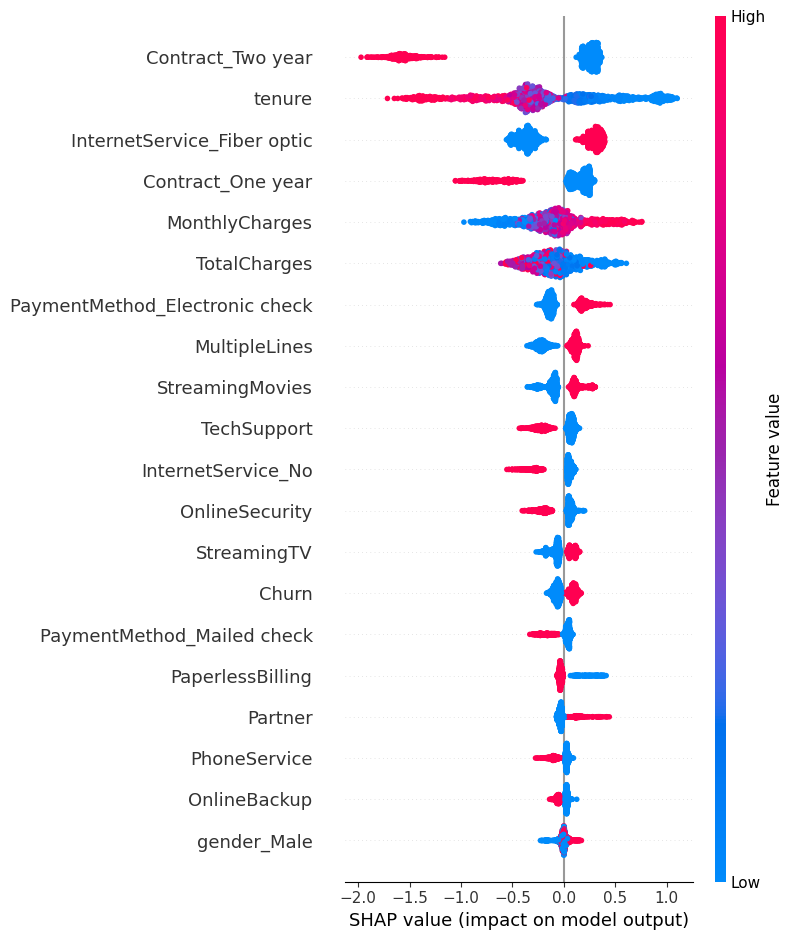

In [ ]:
import shap


best_xgb_pipe = xgb_search.best_estimator_
best_xgb_model = best_xgb_pipe.named_steps['xgb']

xte_trans = best_xgb_pipe.named_steps['prep'].transform(xte)

ohe = best_xgb_pipe.named_steps['prep'].named_transformers_['cat'].named_steps['ohe']
ohe_features = ohe.get_feature_names_out(catcol)
feature_names_final = list(numcol) + list(ohe_features) + list(binary_cols)

shap.initjs()
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(xte_trans)

shap.summary_plot(shap_values, xte_trans, feature_names=feature_names_final, plot_type='bar')
shap.summary_plot(shap_values, xte_trans, feature_names=feature_names_final)

shap.force_plot(explainer.expected_value, shap_values[0], xte_trans[0])


After the explainer, we made a easy-to-explain 'Churn risk scoring system'.

This is supposed to tell us which customer has a higher risk of churn and later we further expanded that by mentioning the features that are affecting the churn.

In [ ]:
#making churn risk scoring system
df_raw = pd.read_csv('/content/Telco-Customer-Churn.csv')
df_raw = df_raw[df_raw['TotalCharges'] != ' ']
df_raw['TotalCharges'] = df_raw['TotalCharges'].astype(float)
df_raw.reset_index(drop=True, inplace=True)


best_model = xgb_search.best_estimator_
probas = best_model.predict_proba(xx)[:, 1]

def risk_bucket(p):
  if p<0.3:
    return 'low'
  elif p < 0.6:
    return 'medium'
  else:
    return 'high'

risk_df = pd.DataFrame()
risk_df['customerID'] = df_raw['customerID']
risk_df['prob'] = probas
risk_df['pred'] = (probas >= best_t).astype(int)
risk_df['risk_level'] = risk_df['prob'].apply(risk_bucket)

risk_df.info()
risk_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerID  7032 non-null   object 
 1   prob        7032 non-null   float32
 2   pred        7032 non-null   int64  
 3   risk_level  7032 non-null   object 
dtypes: float32(1), int64(1), object(2)
memory usage: 192.4+ KB


,customerID,prob,pred,risk_level
0,7590-VHVEG,0.887438,1,high
1,5575-GNVDE,0.049114,0,low
2,3668-QPYBK,0.661336,1,high
3,7795-CFOCW,0.080976,0,low
4,9237-HQITU,0.875637,1,high
5,9305-CDSKC,0.942497,1,high
6,1452-KIOVK,0.557472,0,medium
7,6713-OKOMC,0.303165,0,medium
8,7892-POOKP,0.811016,1,high
9,6388-TABGU,0.033091,0,low


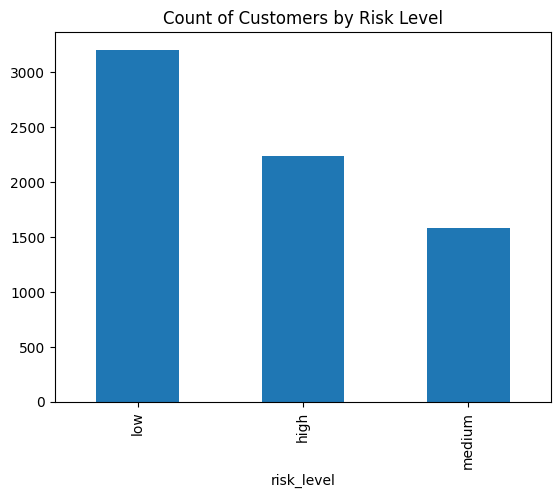

In [ ]:
#Visual Representation of Risk table

risk_df['risk_level'].value_counts().plot(kind='bar')
plt.title("Count of Customers by Risk Level")
plt.show()

We made the above code into a dataframe, and colated the top 5 reasons that were prevalent in the customer churn. we did this per customer.

At the end we did a simple value count to explain which group of reason was most common in the risk scoring system to get an idea on what are some of the common predicted reasons (on average) that compel the customer churn

In [ ]:
shap_df = pd.DataFrame(
    shap_values, columns= feature_names_final
)

def top_feature(shap_row, feature_names, top_n=5):
  s = pd.Series(shap_row, index=feature_names)
  s = s.sort_values(ascending=False)
  return list(s.index[:top_n])


top5_list = shap_df.apply(
    lambda row: top_feature(row, feature_names_final, top_n=5),
    axis = 1
)


risk_df['top_5'] = top5_list

print(risk_df.head(15))



    customerID      prob  pred risk_level  \
0   7590-VHVEG  0.887438     1       high   
1   5575-GNVDE  0.049114     0        low   
2   3668-QPYBK  0.661336     1       high   
3   7795-CFOCW  0.080976     0        low   
4   9237-HQITU  0.875637     1       high   
5   9305-CDSKC  0.942497     1       high   
6   1452-KIOVK  0.557472     0     medium   
7   6713-OKOMC  0.303165     0     medium   
8   7892-POOKP  0.811016     1       high   
9   6388-TABGU  0.033091     0        low   
10  9763-GRSKD  0.283045     0        low   
11  7469-LKBCI  0.032590     0        low   
12  8091-TTVAX  0.471448     0     medium   
13  0280-XJGEX  0.694668     1       high   
14  5129-JLPIS  0.697429     1       high   

                                                top_5  
0   [tenure, Contract_Two year, Contract_One year,...  
1   [InternetService_Fiber optic, MonthlyCharges, ...  
2   [tenure, TotalCharges, Contract_Two year, Cont...  
3   [StreamingMovies, StreamingTV, Churn, PaymentM...  

In [ ]:
print(risk_df['top_5'].value_counts())

top_5
[tenure, TotalCharges, Contract_Two year, InternetService_Fiber optic, Contract_One year]                             41
[InternetService_Fiber optic, Contract_Two year, PaymentMethod_Electronic check, Contract_One year, MultipleLines]    28
[tenure, Contract_Two year, InternetService_Fiber optic, Contract_One year, TotalCharges]                             21
[tenure, TotalCharges, Contract_Two year, Contract_One year, TechSupport]                                             18
[tenure, InternetService_Fiber optic, Contract_Two year, Contract_One year, PaymentMethod_Electronic check]           17
                                                                                                                      ..
[Contract_Two year, MultipleLines, PaymentMethod_Mailed check, TotalCharges, OnlineSecurity]                           1
[tenure, Contract_Two year, TotalCharges, Contract_One year, MonthlyCharges]                                           1
[Contract_Two year, tenure





| Insight                                                | Explanation                                         |
| ------------------------------------------------------ | --------------------------------------------------- |
| Month-to-month contracts churn more                    | They lack commitment, easy to leave                 |
| Fiber optic users churn more                           | Often due to price complaints + service instability |
| Higher monthly charges → more churn                    | Direct financial dissatisfaction                    |
| Autopay users churn less                               | Automation reduces friction                         |
| Long-tenure customers churn far less                   | Loyalty strongly reduces risk                       |
| One-year & two-year contracts reduce churn             | Lock-in and discounts                               |
| No Tech Support increases churn                        | Support issues correlate with dissatisfaction       |
| Streaming service add-ons do not strongly affect churn | Low impact features compared to billing + contract  |



#Ending Summary -

The churn model revealed that customers tend to leave for a small number of consistent reasons. Across thousands of predictions, the same SHAP feature combinations appeared again and again — mainly low tenure, fiber-optic plans, high charges, electronic check payments, and weak support services.

These repeating patterns act as churn signatures, helping the business quickly identify high-risk segments instead of guessing. With this model, churn risk is not only predictable — it is explainable, targeted, and actionable, giving the company a clear path to reduce customer loss.